In [1]:
import pandas as pd

# Load the Excel file (replace 'file_path.xlsx' with the actual file path)
file_path = 'All_aligned_spectra v3.xlsx'  # Update this with the correct file path
df = pd.read_excel(file_path)

# Display basic information about the dataset
print("Dataset Structure:")
print(df.head())  # Show the first few rows of the dataset

print("\nDataset Dimensions:")
print(df.shape)  # Show the number of rows and columns

print("\nColumn Information:")
print(df.info())  # Show data types and non-null counts for each column

print("\nSummary Statistics:")
print(df.describe())  # Show summary statistics for numerical columns

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

Dataset Structure:
   ClassID           Primary ID  -1.93978  -1.92978  -1.91978  -1.90978  \
0     EVOO  296_ControlNMR-EVOO -0.037742 -0.037742 -0.003322 -0.007332   
1     EVOO  297_ControlNMR-EVOO -0.020159 -0.020159 -0.020159 -0.014388   
2     EVOO  298_ControlNMR-EVOO -0.042973 -0.042973 -0.025936 -0.014853   
3     EVOO  302_ControlNMR-EVOO -0.053067 -0.053067 -0.022915 -0.017543   
4     EVOO  304_ControlNMR-EVOO -0.081616 -0.072992 -0.066752 -0.050121   

   -1.89978  -1.88978  -1.87978  -1.86978  ...     11.91     11.92     11.93  \
0 -0.005643 -0.000488  0.022687  0.045279  ...  0.430493  0.416529  0.400159   
1  0.005981  0.011637  0.032143  0.046074  ...  0.449157  0.419575  0.400303   
2  0.004859 -0.001755  0.018581  0.027658  ...  0.391275  0.373789  0.363355   
3 -0.010908  0.002723  0.013443  0.027859  ...  0.416158  0.393003  0.385488   
4 -0.039328 -0.023604 -0.010942 -0.011524  ...  0.375700  0.394719  0.375971   

      11.94     11.95     11.96     11.97     11.

In [2]:
# Drop rows with missing ClassID
df = df.dropna(subset=['ClassID'])
# Separate metadata and numerical data
metadata = df[['ClassID', 'Primary ID']]
numerical_data = df.iloc[:, 2:]  # All columns except the first two
# Apply baseline correction (subtract row-wise minimum)
numerical_data = numerical_data.sub(numerical_data.min(axis=1), axis=0)
from sklearn.preprocessing import StandardScaler

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_data, columns=numerical_data.columns)
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
reduced_data = pca.fit_transform(scaled_data)

print(f"Number of components after PCA: {pca.n_components_}")
# Combine metadata with the processed numerical data
processed_data = pd.concat([metadata.reset_index(drop=True), 
                            pd.DataFrame(reduced_data)], axis=1)

Number of components after PCA: 2


Summary Statistics for Numerical Data:
          count      mean       std       min      25%      50%       75%  \
-1.93978   57.0  0.113774  0.035981  0.017867  0.09735  0.11734  0.135270   
-1.92978   57.0  0.106916  0.034333  0.017867  0.08725  0.10968  0.119999   
-1.91978   57.0  0.097440  0.033793  0.032427  0.07657  0.09581  0.104130   
-1.90978   57.0  0.088694  0.043365  0.025300  0.06323  0.07887  0.101947   
-1.89978   57.0  0.084950  0.051352  0.020040  0.05369  0.06169  0.107790   
...         ...       ...       ...       ...      ...      ...       ...   
 11.96     57.0  0.277585  0.154480  0.105910  0.14372  0.21030  0.461940   
 11.97     57.0  0.268971  0.158756  0.091430  0.12675  0.20541  0.459968   
 11.98     57.0  0.260408  0.165370  0.072400  0.12226  0.18296  0.456507   
 11.99     57.0  0.258263  0.180137  0.052270  0.11659  0.15972  0.473834   
 12        57.0  0.268319  0.218182  0.031490  0.09262  0.15972  0.505867   

               max  
-1.93978  0.205

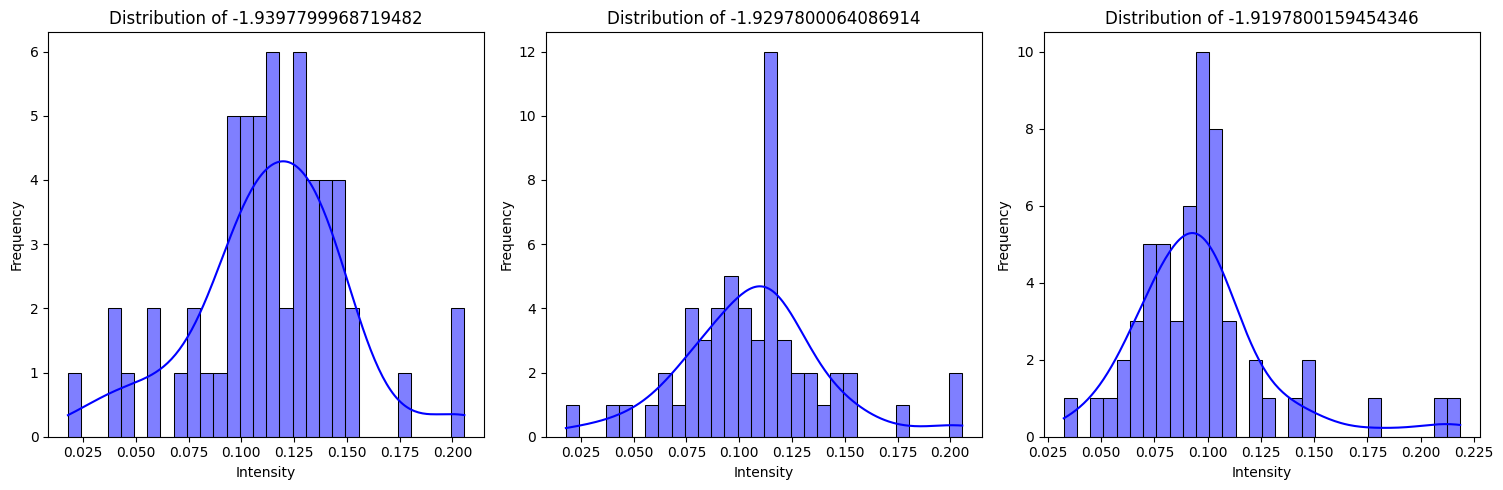

  ClassID           Primary ID        PC1       PC2
0    EVOO  296_ControlNMR-EVOO -48.811540  0.110592
1    EVOO  297_ControlNMR-EVOO -47.432478  2.776180
2    EVOO  298_ControlNMR-EVOO -46.867710  3.153087
3    EVOO  302_ControlNMR-EVOO -48.861587  0.112867
4    EVOO  304_ControlNMR-EVOO -45.886897  5.909521


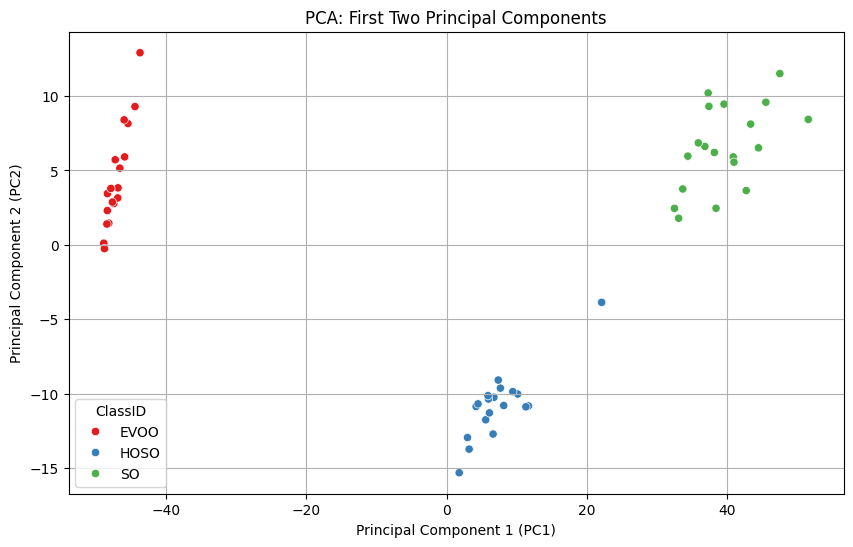

C:\Users\Roqui\AppData\Local\Temp\ipykernel_8088\2133269880.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([metadata['ClassID'], numerical_data[col]], axis=1),
C:\Users\Roqui\AppData\Local\Temp\ipykernel_8088\2133269880.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([metadata['ClassID'], numerical_data[col]], axis=1),
C:\Users\Roqui\AppData\Local\Temp\ipykernel_8088\2133269880.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pd.concat([metadata['ClassID'], numerical_data[col]], axis=1),


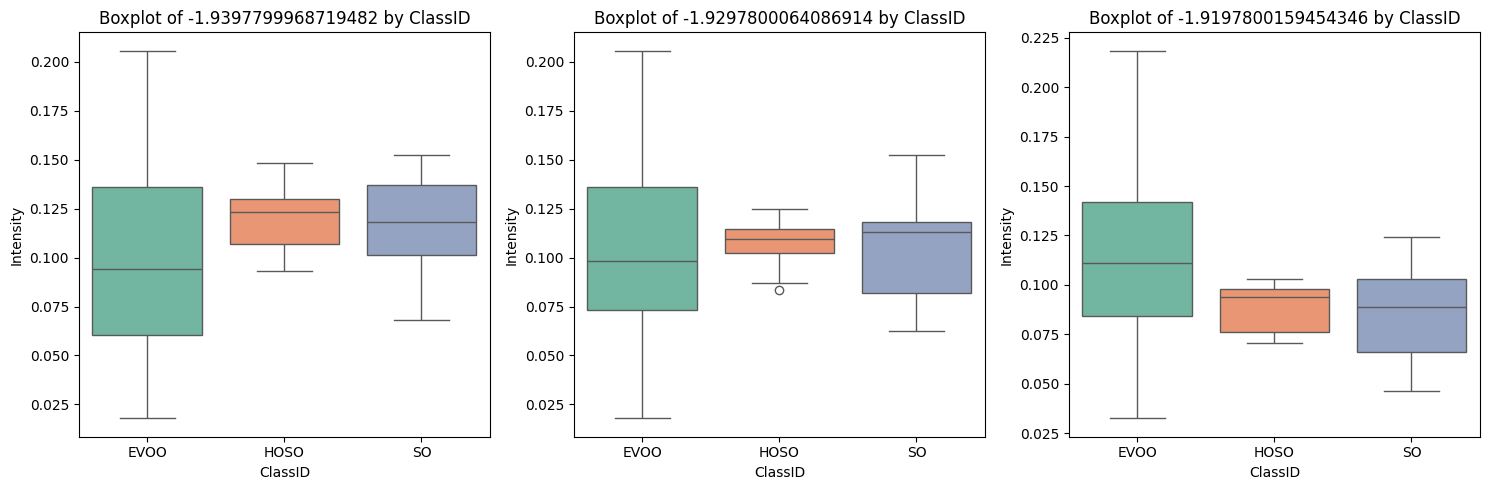

In [5]:
import seaborn as sns
# Summary statistics for numerical data
numerical_summary = numerical_data.describe().T
print("Summary Statistics for Numerical Data:")
print(numerical_summary)

# Class distribution in ClassID
class_distribution = metadata['ClassID'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

import matplotlib.pyplot as plt

# Histogram of NMR intensities for a few representative features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_data.columns[:3]):  # Example: First 3 columns
    plt.subplot(1, 3, i + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Combine metadata with the PCA-reduced data
processed_data = pd.concat([
    metadata.reset_index(drop=True), 
    pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])  # Explicitly name the columns
], axis=1)

# Verify the structure of the processed data
print(processed_data.head())

# Scatter plot of PC1 vs PC2 colored by ClassID
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_data, x='PC1', y='PC2', hue='ClassID', palette='Set1')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='ClassID')
plt.grid(True)
plt.show()

# Boxplot of NMR intensities for a few representative features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_data.columns[:3]):  # Example: First 3 columns
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=pd.concat([metadata['ClassID'], numerical_data[col]], axis=1), 
                x='ClassID', y=col, palette='Set2')
    plt.title(f"Boxplot of {col} by ClassID")
    plt.xlabel("ClassID")
    plt.ylabel("Intensity")
plt.tight_layout()
plt.show()

Explained Variance Ratio of PC1 and PC2:
[0.93136977 0.04803226]

Feature Loadings for PC1 and PC2:
               PC1       PC2
-1.93978  0.006723  0.012740
-1.92978  0.001054  0.021158
-1.91978 -0.011271  0.036087
-1.90978 -0.017377  0.040531
-1.89978 -0.019740  0.048332

Top Features Contributing to PC1:
4.49014     0.027727
0.020195    0.027723
4.48014     0.027721
4.50014     0.027718
0.010195    0.027717
Name: PC1, dtype: float64

Top Features Contributing to PC2:
11.83    0.117075
11.82    0.116906
11.81    0.116578
11.84    0.116140
11.8     0.115108
Name: PC2, dtype: float64
Silhouette Score: 0.77


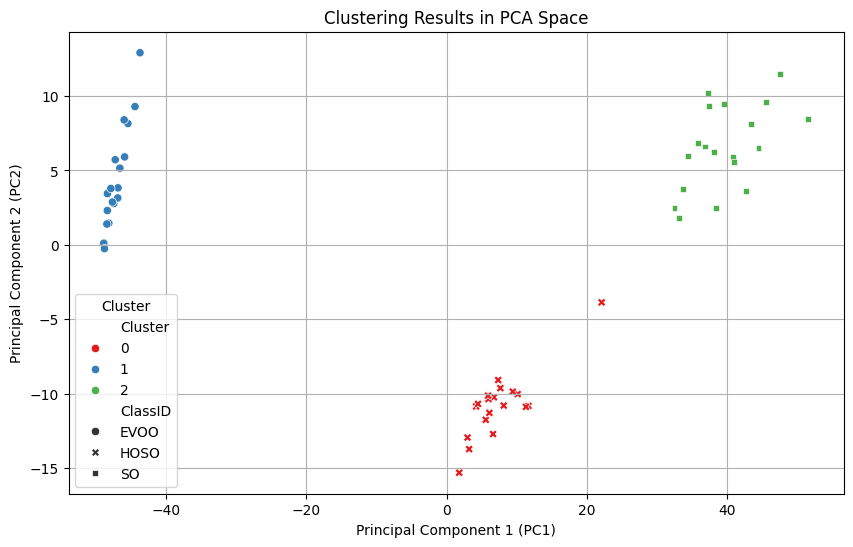

In [6]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of PC1 and PC2:")
print(explained_variance)

# Feature loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=numerical_data.columns
)
print("\nFeature Loadings for PC1 and PC2:")
print(loadings.head())  # Show loadings for the first few features

# Top contributing features for PC1 and PC2
top_features_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(5)
top_features_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(5)
print("\nTop Features Contributing to PC1:")
print(top_features_pc1)
print("\nTop Features Contributing to PC2:")
print(top_features_pc2)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply k-means clustering with k=3 (number of classes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the processed data
processed_data['Cluster'] = clusters

# Silhouette score to evaluate clustering quality
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_data, x='PC1', y='PC2', hue='Cluster', palette='Set1', style='ClassID')
plt.title('Clustering Results in PCA Space')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Training set size: 45
Testing set size: 12

PLS-DA Accuracy: 1.00

Classification Report (PLS-DA):
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         4
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



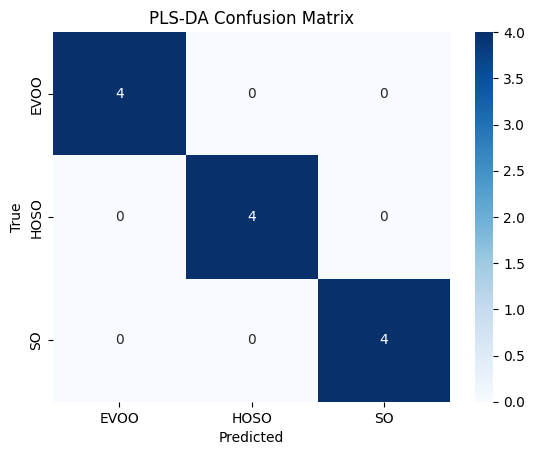


SVM Accuracy: 1.00

Classification Report (SVM):
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         4
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



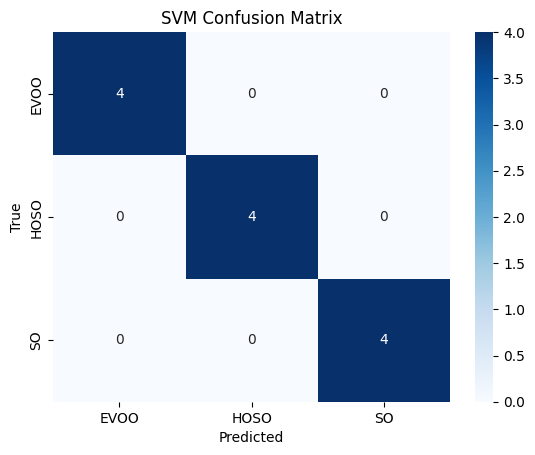


Random Forest Accuracy: 1.00

Classification Report (Random Forest):
              precision    recall  f1-score   support

        EVOO       1.00      1.00      1.00         4
        HOSO       1.00      1.00      1.00         4
          SO       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12


Top 10 Important Features (Random Forest):
      Feature  Importance
24   -1.69978    0.011235
1313  11.1901    0.011174
1130  9.36008    0.010724
538   3.44015    0.010681
1388    11.94    0.010572
10   -1.83978    0.010204
546   3.52015    0.010150
25   -1.68978    0.010017
29   -1.64978    0.009967
501   3.07016    0.009835


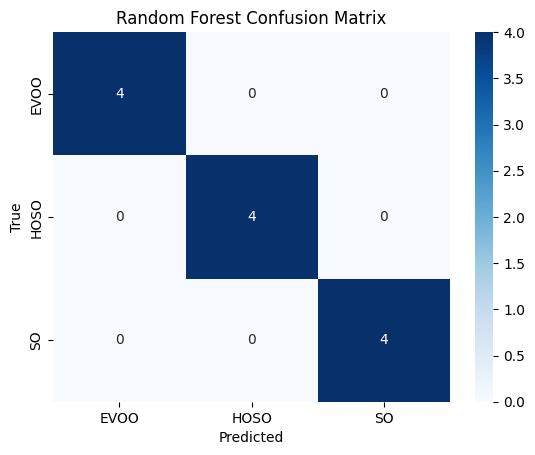

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Step 1: Data Preparation
# Separate features (scaled_data) and target labels (ClassID)
X = scaled_data  # Scaled numerical data
y = metadata['ClassID']  # Target labels

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Encode class labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 2: Train and Evaluate Models

# (a) PLS-DA (Partial Least Squares Discriminant Analysis)
plsda = PLSRegression(n_components=2)  # Reduce to 2 components
plsda.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_plsda_encoded = plsda.predict(X_test)

# Round predictions to the nearest integer and clip to valid range
y_pred_plsda_encoded = np.round(y_pred_plsda_encoded.flatten()).clip(min=0, max=len(label_encoder.classes_) - 1).astype(int)

# Decode back to original class labels
y_pred_plsda = label_encoder.inverse_transform(y_pred_plsda_encoded)

# Evaluate PLS-DA performance
accuracy_plsda = accuracy_score(y_test, y_pred_plsda)
print(f"\nPLS-DA Accuracy: {accuracy_plsda:.2f}")
print("\nClassification Report (PLS-DA):")
print(classification_report(y_test, y_pred_plsda))

# Confusion Matrix for PLS-DA
conf_matrix_plsda = confusion_matrix(y_test, y_pred_plsda)
sns.heatmap(conf_matrix_plsda, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("PLS-DA Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# (b) SVM (Support Vector Machine)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate SVM performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Accuracy: {accuracy_svm:.2f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# (c) Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': numerical_data.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)
print("\nTop 10 Important Features (Random Forest):")
print(feature_importance)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
# Encode the full target variable into numeric values
y_encoded = label_encoder.fit_transform(y)

from sklearn.metrics import make_scorer

# Define a custom scoring function for PLS-DA
def plsda_accuracy_scorer(y_true, y_pred_continuous):
    # Round continuous predictions to the nearest class index and clip to valid range
    y_pred = np.round(y_pred_continuous).clip(min=0, max=len(label_encoder.classes_) - 1).astype(int)
    return accuracy_score(y_true, y_pred)

# Create a scorer object for PLS-DA
plsda_scorer = make_scorer(plsda_accuracy_scorer)

# Evaluate PLS-DA using cross-validation with the custom scorer
plsda_cv_scores = cross_val_score(plsda, X, y_encoded, cv=5, scoring=plsda_scorer)
print(f"PLS-DA Cross-Validation Accuracy: {np.mean(plsda_cv_scores):.2f} ± {np.std(plsda_cv_scores):.2f}")

# Evaluate SVM using cross-validation
svm_cv_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {np.mean(svm_cv_scores):.2f} ± {np.std(svm_cv_scores):.2f}")

# Evaluate Random Forest using cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.2f} ± {np.std(rf_cv_scores):.2f}")

# AUC-ROC for SVM and Random Forest (requires probability estimates)
y_test_encoded = label_encoder.transform(y_test)
svm_probs = svm.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)

svm_auc = roc_auc_score(y_test_encoded, svm_probs, multi_class='ovr')
rf_auc = roc_auc_score(y_test_encoded, rf_probs, multi_class='ovr')

print(f"SVM AUC-ROC: {svm_auc:.2f}")
print(f"Random Forest AUC-ROC: {rf_auc:.2f}")

PLS-DA Cross-Validation Accuracy: 1.00 ± 0.00
SVM Cross-Validation Accuracy: 1.00 ± 0.00
Random Forest Cross-Validation Accuracy: 0.98 ± 0.03
SVM AUC-ROC: 1.00
Random Forest AUC-ROC: 1.00


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Restore the Original Dataset
# Load the original dataset (replace "path_to_your_dataset.csv" with the actual file path)
df_original = pd.read_excel("All_aligned_spectra v3.xlsx")

# Separate metadata and numerical data
metadata_original = df_original[['ClassID', 'Primary ID']]
numerical_data_original = df_original.iloc[:, 2:]  # Numerical columns

# Scale the numerical data
scaler = StandardScaler()
scaled_data_original = scaler.fit_transform(numerical_data_original)
scaled_data_original = pd.DataFrame(scaled_data_original, columns=numerical_data_original.columns)

# Step 2: Identify Unlabeled Samples
# Filter rows where ClassID starts with "Unknown"
unlabeled_mask = metadata_original['ClassID'].str.startswith('Unknown', na=True)
unlabeled_data = scaled_data_original[unlabeled_mask]  # Extract numerical data for unlabeled samples
unlabeled_metadata = metadata_original.loc[unlabeled_mask, ['ClassID']]  # Metadata for unlabeled samples

# Check if there are any unlabeled samples
if unlabeled_data.shape[0] == 0:
    print("No unlabeled samples found. Please verify the filtering condition.")
else:
    # Step 3: Predict Classes for Unlabeled Samples
    # Initialize predictions dictionary
    unlabeled_predictions = {}

    # Predict using PLS-DA
    plsda_unlabeled_encoded = plsda.predict(unlabeled_data)
    plsda_unlabeled_encoded = np.round(plsda_unlabeled_encoded.flatten()).clip(min=0, max=len(label_encoder.classes_) - 1).astype(int)
    unlabeled_predictions['PLS-DA'] = label_encoder.inverse_transform(plsda_unlabeled_encoded)

    # Predict using SVM
    unlabeled_predictions['SVM'] = svm.predict(unlabeled_data)

    # Predict using Random Forest
    unlabeled_predictions['Random Forest'] = rf.predict(unlabeled_data)

    # Create a DataFrame with the predictions
    predictions_df = pd.DataFrame(unlabeled_predictions, index=unlabeled_metadata['ClassID'])
    print("\nPredictions for Unlabeled Samples:")
    print(predictions_df)

    # Calculate confidence scores for SVM and Random Forest
    svm_confidence = svm.predict_proba(unlabeled_data).max(axis=1)
    rf_confidence = rf.predict_proba(unlabeled_data).max(axis=1)

    confidence_df = pd.DataFrame({
        'SVM Confidence': svm_confidence,
        'Random Forest Confidence': rf_confidence
    }, index=unlabeled_metadata['ClassID'])

    print("\nConfidence Scores for Unlabeled Samples:")
    print(confidence_df)


Predictions for Unlabeled Samples:
        PLS-DA   SVM Random Forest
ClassID                           
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO
NaN       HOSO  HOSO          HOSO

Confidence Scores for Unlabeled Samples:
         SVM Confidence  Random Forest Confidence
ClassID                                          
NaN            0.498684                      0.36
NaN            0.480996                      0.37
NaN            0.467296                      0.39
NaN            0.714361                      0.59
NaN            0.683852                      0.60
NaN            0.684467                      0.68
NaN            0.392353                      0.44
NaN            0.624259                      0.59
NaN            0.500967              